In [2]:
import sys
sys.path.append('/home/pqbas/catkin_ws/src/blueberry/src/detection')
from object_detection_models.yolo5 import Yolo5

detector = Yolo5(weights= '/home/pqbas/catkin_ws/src/blueberry/src/detection/weights/experiment_7/best.pt',
                data= '',
                device='cuda:0')

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
YOLOv5 🚀 v7.0-175-g5f11555 Python-3.8.16 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 7974MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs


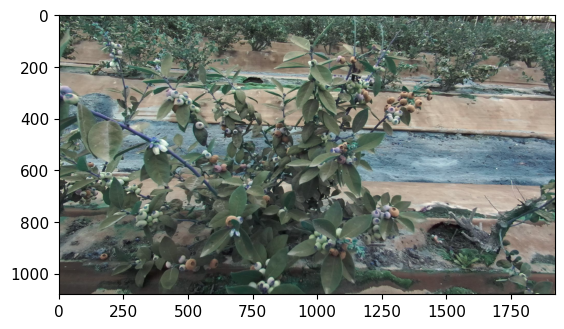

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img0 = cv2.imread('/home/pqbas/catkin_ws/src/blueberry/src/detection/gallery/danper_28Aug23/frames_detection_Z100cm_X75cm/frame_0.png')
#img0 = cv2.cvtColor(img0, cv2.COLOR_RGB2BGR)
plt.imshow(img0)

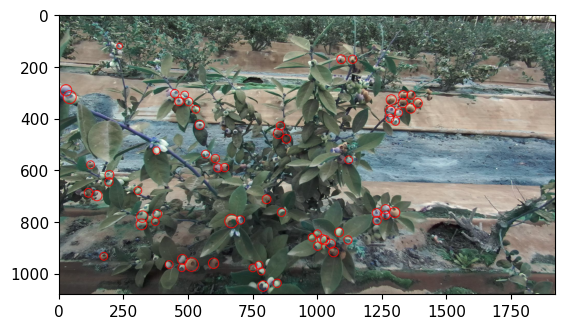

In [3]:
prediction = detector.predict(img0, enable_tracking=False)

if prediction is not None:
    img0 = detector.plot_prediction(img0, prediction)

plt.imshow(img0)

In [5]:
height,width,channels = img0.shape
filename = "frame_0.txt"

with open(filename, 'w') as file:
    for i in range(prediction.shape[0]):
        x1,y1,x2,y2,_,_ = prediction[i]
        xn, yn, wn, hn = (x1+x2)/(2*width), (y1+y2)/(2*height), (x2-x1)/width, (y2-y1)/height
        file.write(f'0 {xn} {yn} {wn} {hn}' + '\n')


In [3]:
import random
import string

def random_string(length=10):
    """Generate a random string of fixed length."""
    letters = string.ascii_letters + string.digits  # alphabets and numbers
    return ''.join(random.choice(letters) for i in range(length))


# IMAGES2DATASET of visit to danper the 28 AUG 23

In [2]:
import os
from PIL import Image
import cv2
import sys
sys.path.append('/home/pqbas/catkin_ws/src/blueberry/src/detection')
from object_detection_models.yolo5 import Yolo5
import random
import string

def random_string(length=10):
    """Generate a random string of fixed length."""
    letters = string.ascii_letters + string.digits  # alphabets and numbers
    return ''.join(random.choice(letters) for i in range(length))


detector = Yolo5(weights= '/home/pqbas/catkin_ws/src/blueberry/src/detection/weights/experiment_7/best.pt',
                data= '',
                device='cuda:0')

# Especifica la ruta de la carpeta que contiene las imágenes
base_path = '/home/pqbas/catkin_ws/src/blueberry/src/detection/gallery/danper_28Aug23/counting2_zed2_rosbag_2023-08-25-09-58-13'
carpeta_imagenes = f"{base_path}/frames"

# Lista todos los archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Filtra solo aquellos archivos que son imágenes (por ejemplo, con extensión .jpg y .png)
imagenes = [archivo for archivo in archivos if archivo.endswith(('.jpg', '.png'))]

# Procesa cada imagen
for idx, imagen in enumerate(imagenes):
    ruta_imagen = os.path.join(carpeta_imagenes, imagen)
    img0 = cv2.imread(ruta_imagen)
    prediction = detector.predict(img0, enable_tracking=False)

    random_name = f'frame_{idx}_{random_string(10)}'

    height,width,channels = img0.shape
    filename = f"{base_path}/dataset/{random_name}.txt"

    cv2.imwrite(f'{base_path}/dataset/{random_name}.png', img0)
    with open(filename, 'w') as file:
        for i in range(prediction.shape[0]):
            x1,y1,x2,y2,_,_ = prediction[i]
            xn, yn, wn, hn = (x1+x2)/(2*width), (y1+y2)/(2*height), (x2-x1)/width, (y2-y1)/height
            file.write(f'0 {xn} {yn} {wn} {hn}' + '\n')
    

YOLOv5 🚀 v7.0-175-g5f11555 Python-3.8.16 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 7974MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs


# IMAGES2DATASET of visit to danper the 28 AUG 23

In [4]:
import os
from PIL import Image
import cv2
import sys
sys.path.append('/home/pqbas/catkin_ws/src/blueberry/src/detection')
from object_detection_models.yolo5 import Yolo5
import random
import string

def random_string(length=10):
    """Generate a random string of fixed length."""
    letters = string.ascii_letters + string.digits  # alphabets and numbers
    return ''.join(random.choice(letters) for i in range(length))


detector = Yolo5(weights= '/home/pqbas/catkin_ws/src/blueberry/src/detection/weights/experiment_7/best.pt',
                data= '',
                device='cuda:0')

# Especifica la ruta de la carpeta que contiene las imágenes
base_path = '/home/pqbas/catkin_ws/src/blueberry/src/detection/gallery/danper_15Sep23'
carpeta_imagenes = f"{base_path}/frames"

# Lista todos los archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Filtra solo aquellos archivos que son imágenes (por ejemplo, con extensión .jpg y .png)
imagenes = [archivo for archivo in archivos if archivo.endswith(('.jpg', '.png'))]

# Procesa cada imagen
for idx, imagen in enumerate(imagenes):
    ruta_imagen = os.path.join(carpeta_imagenes, imagen)
    img0 = cv2.imread(ruta_imagen)
    prediction = detector.predict(img0, conf_thres=0.5, enable_tracking=False)

    random_name = f'frame_{idx}_{random_string(10)}'

    height,width,channels = img0.shape
    filename = f"{base_path}/dataset/{random_name}.txt"

    cv2.imwrite(f'{base_path}/dataset/{random_name}.png', img0)
    with open(filename, 'w') as file:
        for i in range(prediction.shape[0]):
            x1,y1,x2,y2,_,_ = prediction[i]
            xn, yn, wn, hn = (x1+x2)/(2*width), (y1+y2)/(2*height), (x2-x1)/width, (y2-y1)/height
            file.write(f'0 {xn} {yn} {wn} {hn}' + '\n')


YOLOv5 🚀 v7.0-175-g5f11555 Python-3.8.16 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2070 with Max-Q Design, 7974MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
